# Project: Investigate a Dataset - TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information about 10,000 movies collected from `TMDb` Database including user ratings, budget for each movie and revenue.

> Below is the list of columns names in our dataset and their significance
<Ul>
    <li>`id` - This is a unique identifier for each movie </li>   
    <li>`popularity` - A numeric quantity specifying the movie popularity </li>   
    <li>`budget` - The cost in which the movie was made </li>    
    <li>`revenue` - The worldwide revenue generated from the movie </li>    
    <li>`original_title` - The title of the movie before translation or adaptaion </li>   
    <li>`cast` - The name of lead and supporting actors </li><br>
    <li>`homepage` - A link to the homepage of the movie </li><br>
    <li>`director` - The directors of each movie </li><br>
    <li>`tagline` - The movie's tagline </li><br>
    <li>`overview` - A brief description of the movie</li><br>
    <li>`runtime` - The running time of the movie in minutes </li><br>
    <li>`genres` - The genre of the movies; Action, Drama,Adventure etc..</li><br>
    <li>`Production_companies` - The production house of the movie </li><br>
    <li>`release_date` - The date the movie was released </li><br>
    <li>`vote_count` - The count of votes the movie received </li><br>
    <li>`vote_average` - Average rating the movie received</li><br>
    <li>`release_year` - The year the movie was released </li>
</Ul>







### Question(s) for Analysis
> This dataset will be analysed to answer the follwing the following questions;
     1. What year did TMDb Movies made the highest profit?
     2. Which TMDb movie has the highest profit expressed as a percentage of its budget?
     3. What is the correlation between the attributes of our TMDb movies dataset?
     
### Objective of Analysis
> The objective of our analysis are;
    1. To identify the year TMDb movies made the highest profit
    2. To determine the movie that has the highest percentage, when profit is expressed as a percentage of its budget.
    3. To ascertain the correlation between different attributes of TMDb dataset.
    
> Before we proceed in analysing our data, we need to import certain python libraries such as Numpy, pandas, Matplotlib and seaborn which we would need to read, clean, organise and visualize our data for proper understanding.

> importing python libraries below

In [1]:
# importing libraries to use
# we are going to make use of aliases for this libraries for easy callout such as np for numpy, pd for pandas etc 
import numpy as np   
import pandas as pd

#visualisation
import matplotlib.pyplot as plt 

#visualisation
import seaborn as sns 
%matplotlib inline

#setting the backgroud color for our charts
sns.set_style('darkgrid')


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.3MB/s eta 0:00:01  5% |█▉                              | 604kB 20.2MB/s eta 0:00:01    29% |█████████▎                      | 3.0MB 26.9MB/s eta 0:00:01    54% |█████████████████▋              | 5.7MB 28.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.4MB/s eta 0:00:01  2% |▊                               | 286kB 20.8MB/s eta 0:00:01    21% |██████▉                         | 2.8MB 22.7MB/s eta 0:00:01    30% |█████████▋                      | 4.0MB 26.8MB/s eta 0:00:01    39% |████████████▉                   | 5.4MB 28.0MB/s eta 0:00:01    59% |███████████████████             | 7.9MB 24.8MB/s eta 0:00:01    87% |████████████████████████████    | 11.7MB 25.8MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pand

<a id='wrangling'></a>
## Data Wrangling



### General Properties

> Let's read our dataset to have a clear view of what it looks and understand its content. 

In [2]:
# reding our data stored in csv format
df = pd.read_csv('tmdb-movies.csv')

# display the first five rows of our data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Above is the first five rows of our data.

We are going to view the shape of our data using the shape function to know the number of columns and rows contained in our dataset.

In [3]:
# view the shape of our dataset
df.shape

(10866, 21)

In [4]:
# for clear understanding of the values, am using print to indicate the row value and the column value
print('The number of rows are:', df.shape[0],'.', 'The number of columns are:', df.shape[1])

The number of rows are: 10866 . The number of columns are: 21


To further understand our data, we are going to use the info funtion to get more information about the structure of our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the above infomation we have five float datatype, six intergers and eleven objects. We can see as well that there are columns with null /NaN values which we would handle when cleaning our data in the next step below




### Data Cleaning

> We need to clean our data to ultimately increase the overall productivity of our data and allow the highest quality information in our decision making.

> Things we would do to clean and get our data ready are:
    1. Remove null values / missing values.
    2. Remove irrelevant duplicates 


First we need to check for null values in our dataset

In [6]:
#checking for number of null values in our dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We can see that there are several columns with null values. We will be droping all this null values in the next step below

In [7]:
# Droping all NaN and Null values in our dataset and checking if there are NaN values after dropping
df.dropna(inplace=True)

#checking if there is still null values
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Result above shows there are no null values in our dataset anymore.

 We would proceed to check for duplicated rows in our dataset

In [8]:
df.duplicated().sum()

0

There are no duplicates in the dataset. 

In [9]:
#Rechecking the shape of the data
df.shape

(1992, 21)

Our rows has further reduced to 1992 because of the null values that were dropped 

##### Now that our data is clean we would proceed to answer our proposed questions
Befor we proceed,based on our research questions not all columns will be needed for this analysis. We will be dropping all columns we don't need for this analysis in the next step. 

In [10]:
#droping all irrelevant columns
df.drop(columns={'imdb_id','cast','tagline','keywords','homepage','budget_adj','revenue_adj'}, axis=1, inplace=True)

Let's see if the columns were actually dropped

In [11]:
#checking the first five rows of our data
df.head()

,id,popularity,budget,revenue,original_title,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [12]:
#Lets view our data information to recheck if there are still errors
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 14 columns):
id                      1992 non-null int64
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
director                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 233.4+ KB


There is need to convert release_date datatype to datetime

In [13]:
df.release_date = pd.to_datetime(df.release_date)

In [14]:
#check if release_date has been converted to datetime datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 14 columns):
id                      1992 non-null int64
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
director                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null datetime64[ns]
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 233.4+ KB


Let's review the statistics of our dataset to check if there are any abnormality

In [15]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000


From our statistics above we can see that minimum value and 25% of budget and revenue are 0, runtime has the minimum of 0 as well which in real time context is not logical. We will proceed to fix this error in the next step 

In [16]:
#cleaning and correcting the invalid data
# we assigned the 0 values to min_ero varible 
min_ero = df.query('budget == 0 or revenue == 0 or runtime ==0')
min_ero
# below id the rows with the zero (0) values which we need to drop

,id,popularity,budget,revenue,original_title,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Bill Condon,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015
67,334074,2.331636,20000000,0,Survivor,James McTeigue,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015
88,301875,1.959765,0,2000000,Equals,Drake Doremus,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,2015-09-04,135,5.6,2015
95,258509,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Walt Becker,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,2015-12-17,278,5.7,2015
132,263109,1.253580,0,59700000,Shaun the Sheep Movie,Mark Burton|Richard Starzack,When Shaun decides to take the day off and hav...,85,Family|Animation|Comedy|Adventure,Aardman Animations|Studio Canal|Anton Capital ...,2015-02-05,340,6.9,2015
139,193687,1.161812,0,118483,Z for Zachariah,Craig Zobel,"In the wake of a nuclear war, a young woman su...",97,Drama|Science Fiction|Thriller,Palomar Pictures|Lucky Hat Entertainment|Silve...,2015-08-13,181,5.5,2015
143,378373,1.128081,0,0,Brothers of the Wind,Gerado Olivares|Otmar Penker,The way of the eagle is to raise two chicks. T...,98,Adventure|Drama|Family,Terra Mater Factual Studios,2015-12-24,11,7.5,2015
148,353326,1.046518,0,11472454,The Man Who Knew Infinity,Matt Brown,"Growing up poor in Madras, India, Srinivasa Ra...",108,Drama,Animus Films|Edward R. Pressman Film|Kreo Film...,2015-09-17,104,7.1,2015
159,251516,0.953046,630019,0,Kung Fury,David Sandberg,"During an unfortunate series of events, a frie...",31,Action|Comedy|Science Fiction|Fantasy,Laser Unicorns,2015-05-28,487,7.7,2015


In [17]:
#dropping the rows with zero values
df.drop(min_ero.index, axis=0, inplace=True)

In [18]:
#lets check our statistics to confirm if the error has been corrected
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000


From the bove statistics we can see that all 0 (zero) values of min has been cleaned.

Having cleaned our dataset, let's view the basic information of our cleaned data and the shape


In [19]:
#Information of cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 14 columns):
id                      1287 non-null int64
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
director                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 150.8+ KB


In [20]:
#checking the shape of the dataset
df.shape

(1287, 14)

We have 1287 rows and 14 columns remaining

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What year did TMDb Movies made the highest profit?

To answer this question we need to create a new column for profit, This we would achieve by deducting our budget column data from revenue column data in the next step. 

In [21]:
#creating a profit column
df['profit'] = df['revenue'] - df['budget']

In [22]:
#checking if our column has been created
df.head()

,id,popularity,budget,revenue,original_title,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


In [23]:
#checking the datatype of our profit column
df.profit.dtypes

dtype('int64')

We can see that the new column is an integer. Let's proceed with our question

In [24]:
#assigning the first five years with the highest profit to maxp variable
maxp = df[['release_year','profit']].sort_values('profit', ascending = False).head(5) 

# we selected only release_year and profit column and sorted it descending order to get the first five years with the highest profit

# let's have a look at our new table 
maxp

,release_year,profit
1386,2009,2544505847
3,2015,1868178225
5231,1997,1645034188
0,2015,1363528810
4,2015,1316249360


##### From the above we can see that 2015 appeared three times which makes our query wrong.
> 1. To resolve and get the actual year with the highest profit, we need to get the unique year values with the sum of all the profit generated in each year from our table.
> 2. After which we would create a new table with our result.
> 3. We would plot our information in a barchart for proper visualization.

In [25]:
#grouping our data by release year and summing up the profit
year = df.groupby('release_year')['profit'].sum()

In [26]:
# let's have a look at our year dataset
year

release_year
1961        1000000
1962       58500000
1963       76398765
1964      121900549
1965      130195658
1967      102084787
1969       74974493
1971      170269000
1972      239066411
1973      588083981
1974       90572000
1975      579975267
1977      935836680
1978      208000000
1979      333891781
1980      540778361
1981      650164919
1982      790962062
1983      880612147
1984      648928023
1985      484537722
1986      -14000000
1987      385742146
1988       13291779
1989      872823860
1990      745978490
1991      336785279
1992     1016419063
1993     1272504993
1994      989416526
1995     1025681406
1996     1116678642
1997     2753205533
1998      815219235
1999     3851184237
2000     1307840750
2001     3148328186
2002     4156386568
2003     3996413806
2004     5859592722
2005     3761788467
2006     6088139016
2007    10014836079
2008     8017278395
2009    12722818634
2010    11995828331
2011    13960424906
2012    12942339736
2013    10927923265
2014   

Having achieved this we would sort our year data to get the first five years that has the highest profit 

In [27]:
#sorting for the first five years with the highest profit
year.sort_values(ascending = False).head(5)

release_year
2015    16531677567
2011    13960424906
2012    12942339736
2009    12722818634
2010    11995828331
Name: profit, dtype: int64

From our data we can see that TMDB movie made the highest profit in 2015

We need to create a new table with our new dataset to plot it for proper visualization 

In [28]:
# creating a new table with our new dataset 
year_p = pd.DataFrame({'year':[2015,2012,2011,2010,2009], 'profit':[16531677567,12942339736,13960424906,11995828331,12722818634]},columns=['year','profit'])

In [29]:
#lets have a look at our new table
year_p

,year,profit
0,2015,16531677567
1,2012,12942339736
2,2011,13960424906
3,2010,11995828331
4,2009,12722818634


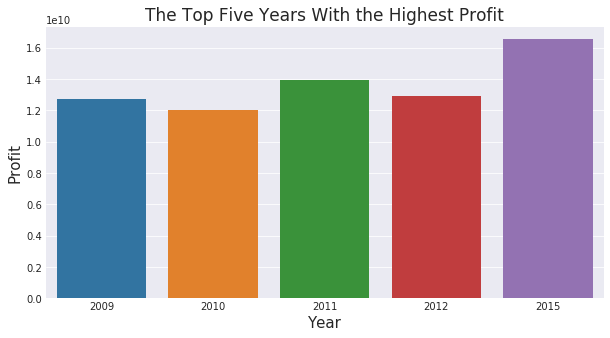

In [30]:
#ploting our data on barchart for proper visualisation
plt.figure(figsize=(10,5))

#barchart
sns.barplot(x='year', y='profit', data=year_p)

# the title of our diagram
plt.title('The Top Five Years With the Highest Profit', fontsize=17)
#labelling x 
plt.xlabel('Year',fontsize=15)

#labelling y 
plt.ylabel('Profit',fontsize=15)

#Display
plt.show()

The barchart above shows that 2015 has the highest profit followed by 2011,2012,2009 and 2010 

### Research Question 2:  Which TMDb Movie has the Highest Profit  Expressed as a Percentage of its Budget?

For us to answer this question, we need to create a ne column called profit_by_budget. This profit_of_budget will be created by dividing our profit column data with the budget column and multiply it by 100 to get the percentage value.

In [31]:
#creating a new column called profit_of_budget
df['profit_by_budget'] = df['profit'] // df['budget'] * 100

In [32]:
#lets view the first two rows of our data to confirm if our new column was created 
df.head()

,id,popularity,budget,revenue,original_title,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,profit_by_budget
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,900
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354,100
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201,100
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225,900
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360,600


In [33]:
#lets see the data type of our new column
df.profit_by_budget.dtypes

dtype('int64')

In [34]:
#Let's have a look at the information of our new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 16 columns):
id                      1287 non-null int64
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
director                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
profit                  1287 non-null int64
profit_by_budget        1287 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(5)
memory usage: 170.9+ KB


 ##### Our profit_of_budget is a float datatype but pandas stored it as integer. We would proceed to correct this error in the next step below.

In [35]:
# Convert the profit_of_budget to float
df.profit_by_budget = df.profit_by_budget.astype(float)

In [36]:
#Let's confirm if it has been converted to float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 16 columns):
id                      1287 non-null int64
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
director                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
profit                  1287 non-null int64
profit_by_budget        1287 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(7), object(5)
memory usage: 170.9+ KB


We can see that our profit_by_budget column data has been converted to float


In [37]:
#sorting our data to get the first five movie titles with the highest profit expressed as a percentage of there budget
movie_p = df[['original_title','profit_by_budget']].sort_values('profit_by_budget', ascending=False).head()
movie_p

,original_title,profit_by_budget
3608,From Prada to Nada,2688000.0
7447,Paranormal Activity,1288900.0
2449,The Blair Witch Project,991900.0
3581,"Love, Wedding, Marriage",137700.0
242,The Gallows,42500.0


We can see that `From Prada to Nada` movie has the highest profit when expressed as a percentage of it's budget.

Let's plot our information on a chart for proper visualization.

In [38]:
#reseting the index column to original title
movie_p.set_index('original_title', inplace=True)

In [39]:
#checking if our index column has changed to original title
movie_p

,profit_by_budget
original_title,
From Prada to Nada,2688000.0
Paranormal Activity,1288900.0
The Blair Witch Project,991900.0
"Love, Wedding, Marriage",137700.0
The Gallows,42500.0


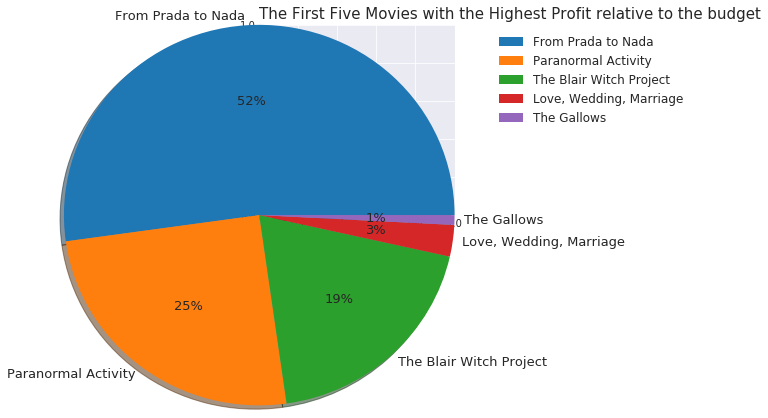

In [40]:
#defining the size of our diagram
plt.figure(figsize=(3.5,3.5))

#size of our movie title text
textprops = {"fontsize":13}

#organizing our data in a piechart for proper visualisation
plt.pie(movie_p.profit_by_budget, labels=movie_p.index, textprops = textprops, labeldistance=1.05, autopct ='%.0f%%', shadow=True, frame=True)

#legend
plt.legend(labels=movie_p.index, loc='upper center', bbox_to_anchor=(1.7,1), ncol=1, fontsize=12)

#Title of our piechart
plt.title('The First Five Movies with the Highest Profit relative to the budget', loc='left', fontsize = 15)

#display
plt.show()

We can clearly see from the piechart above that `From Prada to Nada` has the highest profit related to budget followed by `paranormal Activity`

`The Blair Witch Project`, `Love, Wedding, Marriage` and `The Gallows`  

### Research Question 3: What is the correlation between the attributes of our TMDb movies dataset?

In [42]:
#finding the correlation in our dataset
cor = df.corr()

In [43]:
#calling out our correlation
cor

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit,profit_by_budget
id,1.000000,0.189301,-0.050921,-0.031441,-0.013123,0.059368,0.004985,0.494397,-0.023688,-0.010274
popularity,0.189301,1.000000,0.432791,0.594755,0.322390,0.744088,0.355904,0.059243,0.582064,-0.021513
budget,-0.050921,0.432791,1.000000,0.706888,0.337373,0.583038,0.075168,0.179160,0.569160,-0.045054
revenue,-0.031441,0.594755,0.706888,1.000000,0.371226,0.775374,0.296501,0.028022,0.983914,-0.012822
runtime,-0.013123,0.322390,0.337373,0.371226,1.000000,0.426505,0.385210,-0.071863,0.346323,-0.034892
vote_count,0.059368,0.744088,0.583038,0.775374,0.426505,1.000000,0.464812,0.071290,0.754078,-0.022417
vote_average,0.004985,0.355904,0.075168,0.296501,0.385210,0.464812,1.000000,-0.163737,0.325682,-0.034183
release_year,0.494397,0.059243,0.179160,0.028022,-0.071863,0.071290,-0.163737,1.000000,-0.012674,-0.000087
profit,-0.023688,0.582064,0.569160,0.983914,0.346323,0.754078,0.325682,-0.012674,1.000000,-0.003527
profit_by_budget,-0.010274,-0.021513,-0.045054,-0.012822,-0.034892,-0.022417,-0.034183,-0.000087,-0.003527,1.000000


For proper visualisation and understanding of the above statistics, we would plot our correlation on a heat map chart.

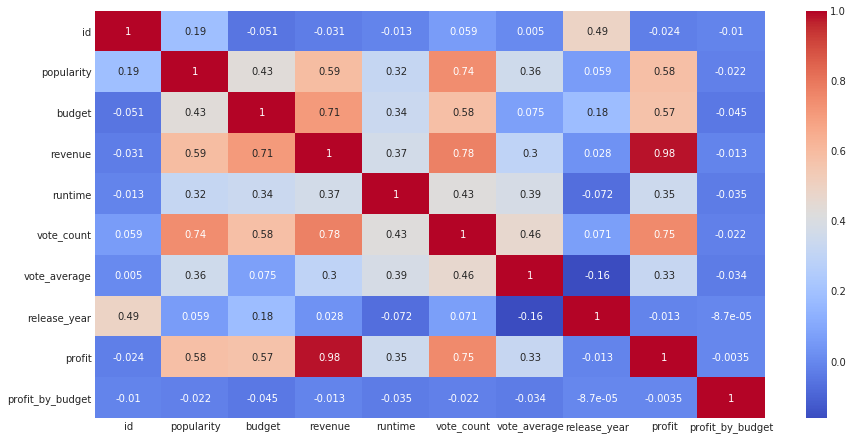

In [44]:
#defining the size of our diagram
plt.figure(figsize=(15,7.5))

#plotting our correlation on Heat map chart
sns.heatmap(cor, cmap = 'coolwarm', annot =True)


From our statistics above we can see that;
<Ul>
    <li>`popularity` has a high correlation with `vote_count` of 0.74 which means that, the popularity of a movie is dependent on its vote count. Also the lower the vote count the lower the popularity of each movie and vice versa.</li><br>
    <li>`revenue` has a high correlation with `budget`, meaning that the amount of revenue generated on any movie depends on the budget of the movie.</li><br>
    <li>`revenue` also has a high correlation with `vote_counts` and `profit` with 0.98 for profit and 0.78 for vote counts. This implies that the higher the vote_counts the higher the popularity which leads to increase in revenue and as well increase the profit generated.</li><br>
    <li>`vote_counts` has a high correlation with `profit`, which means that the higher the number of votes received from people on each movie results to that movie making more profit.</li>
</Ul>


<a id='conclusions'></a>
## Conclusions and Findings

> 1. From our analysis we were able to ascertain that TMDb movies generated the highest profit in `2015`. 
> 2. Also, we discovered that `From Prada to Nada` movie has the highest profit in relative to budget.
> 3. We found that;
<Ul>
       <li>`revenue` and `popularity` is highly correlated with `vote_counts`.</li> 
       <li>`revenue` is highly correlated with `budget`.</li>
       <li>`vote_counts` is highly correlated with `profit`.</li>
</Ul>

## Limitations

> The filtered dataset contained vast number of Null values of which certain revenue values where dropped when budget is zero and budget when revenue is zero as well. Also, I dropped many columns from the dataset which where not needed for my analysis.

> ## Refrences
> [Stackoverflow](https://stackoverflow.com)<br>
> [Matplotlib Pie Chart](https://pythonguides.com/matplotlib-pie-chart/)


In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0